<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/planet_tiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.PLANET_TINY)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/models')]

In [0]:
src = ImageList.from_csv(path, 'labels.csv', folder = 'train', suffix = '.jpg').split_by_rand_pct().label_from_df(label_delim = ' ')

In [0]:
src

LabelLists;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;clear;primary;road,clear;primary,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,clear;primary,agriculture;clear;primary,agriculture;clear;cultivation;primary,clear;primary
Path: /root/.fastai/data/planet_tiny;

Test: None

In [0]:
tfms = get_transforms(flip_vert = True, max_zoom=0.1, max_lighting=0.1, max_warp=0.)

In [0]:
data = src.transform(tfms, size = 128).databunch()

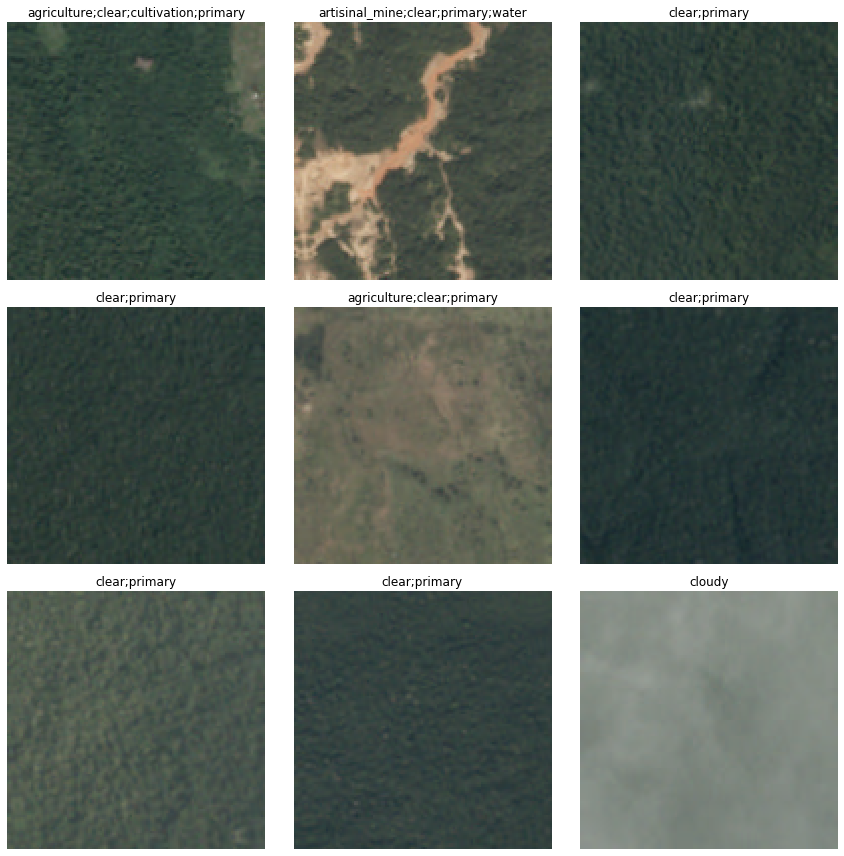

In [0]:
data.show_batch(rows = 3)

In [0]:
ac_thresh = partial(accuracy_thresh, thresh = 0.2)
f_2 = partial(fbeta, thresh = 0.2)

In [44]:
learn = cnn_learner(data,  models.resnet50, metrics = [ac_thresh, f_2])

RuntimeError: ignored

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


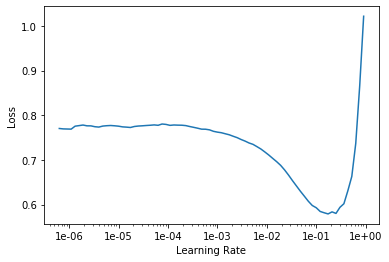

In [0]:
learn.recorder.plot()